In [42]:
import os
import pickle
import cv2 as cv
import numpy as np 
from mtcnn import MTCNN
import tensorflow as tf 
from sklearn.svm import SVC
import matplotlib.pyplot as plt 
from keras_facenet import FaceNet
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
# Feature extraction:

class Feature_Extraction:
    def __init__(self,directory):
        self.directory = directory
        self.target_size = (160,160)
        self.detector = MTCNN()
        self.X = []
        self.Y = []
        
    def extract_face(self, file_name):
        img = cv.imread(file_name)
        img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
        x,y,width,height = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x),abs(y)
        face = img[y:y+height , x:x+width]
        face_arr = cv.resize(face,self.target_size)
        return face_arr
    
    def load_faces(self,dir):
        FACE = []
        for im_name in os.listdir(dir):
            try: 
                path = dir + im_name

                single_face = self.extract_face(path)
                FACE.append(single_face)
            except Exception as e:
                print("Exception while load_face: {}".format(e))
        return FACE
    
    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory + '/' + sub_dir + '/'
            print(path)
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            self.X.extend(FACES)
            self.Y.extend(labels)
        return np.asarray(self.X), np.asarray(self.Y)
        
    def plot_image(self):
        for num,image in enumerate(self.X):
            ncols = 5
            nrows = len(self.Y)//ncols
            plt.subplot(nrows,ncols,num+1)
            plt.axis("off")
            plt.imshow(image)
            

face_loading = Feature_Extraction("dataset")
X,Y = face_loading.load_classes()           

dataset/taylor_swift/
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


2024-10-10 12:42:02.033748: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 97478640 exceeds 10% of free system memory.
2024-10-10 12:42:02.250528: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 97478640 exceeds 10% of free system memory.
2024-10-10 12:42:02.250657: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 97478640 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━

2024-10-10 12:42:16.121107: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160524160 exceeds 10% of free system memory.
2024-10-10 12:42:16.413511: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 160524160 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 751ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━

In [3]:
len(Y)

50

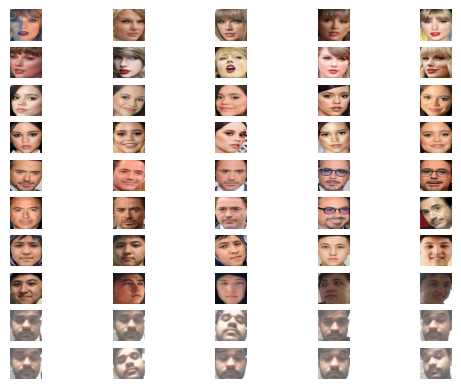

In [4]:
face_loading.plot_image()

In [5]:
embedder = FaceNet()

def get_embedding(img):
    face_img = img.astype(np.float32) # 3d (160,160,3)
    face_img = np.expand_dims(face_img,axis=0) # 4D (None,160,160,3)
    yhat = embedder.embeddings(face_img)
    return yhat

EMBEDDING_X  = []
for img in X:
    EMBEDDING_X.append(get_embedding(img))
EMBEDDING_X = np.asarray(EMBEDDING_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [6]:
np.savez_compressed("face_net_embedding",EMBEDDING_X)

<br>

# `preparation for ml SVM:`

<br>

In [7]:
Y # we need to convert this into number: we will use label encoding: cause here we use uqinue name of the folder: 

array(['taylor_swift', 'taylor_swift', 'taylor_swift', 'taylor_swift',
       'taylor_swift', 'taylor_swift', 'taylor_swift', 'taylor_swift',
       'taylor_swift', 'taylor_swift', 'jenna_ortega', 'jenna_ortega',
       'jenna_ortega', 'jenna_ortega', 'jenna_ortega', 'jenna_ortega',
       'jenna_ortega', 'jenna_ortega', 'jenna_ortega', 'jenna_ortega',
       'robert_downey', 'robert_downey', 'robert_downey', 'robert_downey',
       'robert_downey', 'robert_downey', 'robert_downey', 'robert_downey',
       'robert_downey', 'robert_downey', 'sardor_abdirayimov',
       'sardor_abdirayimov', 'sardor_abdirayimov', 'sardor_abdirayimov',
       'sardor_abdirayimov', 'sardor_abdirayimov', 'sardor_abdirayimov',
       'sardor_abdirayimov', 'sardor_abdirayimov', 'sardor_abdirayimov',
       'yasin', 'yasin', 'yasin', 'yasin', 'yasin', 'yasin', 'yasin',
       'yasin', 'yasin', 'yasin'], dtype='<U18')

In [8]:
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Y)
Y

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4])

In [23]:
X_train,X_test,y_train,y_test = train_test_split(EMBEDDING_X,Y,test_size=0.2,random_state=17,shuffle=True)
print("X_train shpae : {}".format(X_train.shape))
print("y_train shpae : {}".format(y_train.shape))
print("X_test shpae : {}".format(X_test.shape))
print("y_test shpae : {}".format(y_test.shape))

X_train shpae : (40, 1, 512)
y_train shpae : (40,)
X_test shpae : (10, 1, 512)
y_test shpae : (10,)


In [25]:
X_train = X_train.reshape(40,512)
X_test = X_test.reshape(10,512)

In [26]:
model = SVC(kernel="linear",probability=True)
model.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

In [29]:
y_pred = model.predict(X_test)
accuracy_score(y_pred=y_pred,y_true=y_test)*100

100.0

<br>

# `test a person:`

<br>

In [39]:
detector = MTCNN()
embedder = FaceNet()
test_img = cv.imread("dataset/taylor_swift/2.jpg")
test_img = cv.cvtColor(test_img,cv.COLOR_BGR2RGB)
x,y,width,height = detector.detect_faces(test_img)[0]['box']
test_img = test_img[y:y+height ,x:x+width]
test_img = cv.resize(test_img,(160,160))
embd_vec = embedder.embeddings([test_img])
y_pred = model.predict(embd_vec)
labelEncoder.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


array(['taylor_swift'], dtype='<U18')

In [40]:
test_img = cv.imread("dataset/yasin/343571e2-69ec-11ef-83ba-f48c50632a09.jpg")
test_img = cv.cvtColor(test_img,cv.COLOR_BGR2RGB)
x,y,width,height = detector.detect_faces(test_img)[0]['box']
test_img = test_img[y:y+height ,x:x+width]
test_img = cv.resize(test_img,(160,160))
embd_vec = embedder.embeddings([test_img])
y_pred = model.predict(embd_vec)
labelEncoder.inverse_transform(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


array(['yasin'], dtype='<U18')

In [47]:

# save the svm model with pickle

with open("svm_face_verification_model.pkl",'wb') as f:
    pickle.dump(model,f)


<br>
<br>

---

# `Perform real Time faceRecognition: `

---

<br>
<br>

In [59]:

facenet = FaceNet()
faces_embeddings = np.load("face_net_embedding.npz")
haarcascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")
model = pickle.load(open("svm_face_verification_model.pkl", 'rb'))
cap = cv.VideoCapture(0)


while cap.isOpened():
    _, frame = cap.read()
    rgb_img = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
    gray_img = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = haarcascade.detectMultiScale(gray_img, 1.3, 5)
    for x,y,w,h in faces:
        img = rgb_img[y:y+h, x:x+w]
        img = cv.resize(img, (160,160)) 
        img = np.expand_dims(img,axis=0)
        ypred = facenet.embeddings(img)
        face_name = model.predict(ypred)
        if face_name:
            final_name = labelEncoder.inverse_transform(face_name)[0]
            cv.rectangle(frame, (x,y), (x+w,y+h), (255,0,255), 10)
            cv.putText(frame, str(final_name), (x,y-10), cv.FONT_HERSHEY_SIMPLEX,
                   1, (0,0,255), 3, cv.LINE_AA)

    cv.imshow("Face Recognition:", frame)
    if cv.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
